<h1>Cartopy and SkewT Plotting Examples</h1>

In [ ]:
%%bash
bash ../aznbsetup.sh

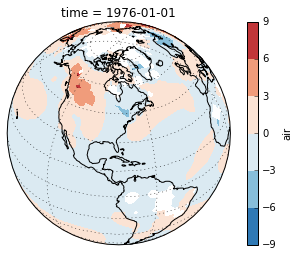

In [6]:
import xarray as xr
import matplotlib.pyplot as plt
ncfile1=xr.open_dataset('air.2x2.250.mon.anom.comb.nc')
ncfile1.keys()

import pandas as pd
import cartopy.crs as crs
#Select January 2017, make lats and lons 2D so basemap knows where to plot each point

jan1976 = ncfile1.sel(time=pd.datetime(1976,1,1))
jan2017 = ncfile1.sel(time=pd.datetime(2017,1,1))

#Clean up data masking - this will maske where data is nan, and put the good values in there
#data = np.ma.masked_where(np.isnan(jan2017['air'].values),jan2017['air'].values)
data = jan1976['air']
data2 = jan2017['air']

# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])

ax = plt.axes(projection=crs.Orthographic(-80, 35))
data.plot.contourf(ax=ax, transform=crs.PlateCarree());
ax.set_global(); ax.coastlines();ax.gridlines();
    
plt.show()


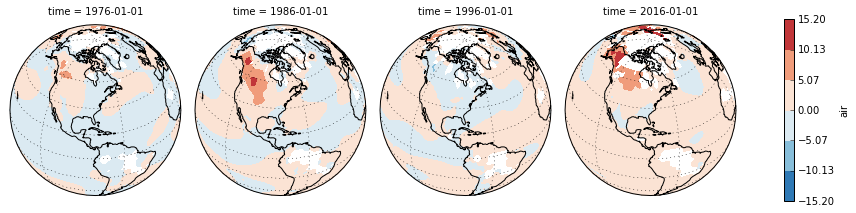

In [7]:
jan1976 = ncfile1.sel(time=pd.datetime(1976,1,1))
jan2017 = ncfile1.sel(time=pd.datetime(2017,1,1))

#You can use the following to find the indices you want to make multiple plots
import numpy as np
dt1=np.datetime64(pd.datetime(1976,1,1))
dt2=np.datetime64(pd.datetime(1986,1,1))
dt3=np.datetime64(pd.datetime(1996,1,1))
dt4=np.datetime64(pd.datetime(2016,1,1))

dt1 = np.where(ncfile1.time.values == dt1)
dt2 = np.where(ncfile1.time.values == dt2)
dt3 = np.where(ncfile1.time.values == dt3)
dt4 = np.where(ncfile1.time.values == dt4)

dt = np.squeeze(np.stack([dt1, dt2,dt3, dt4]))


#Here we are using one line to select two times from our dataframe 'air' Xarray Series 
p = ncfile1['air'].isel(time=dt).plot.contourf(transform=crs.PlateCarree(), col='time',
                               subplot_kws={'projection': crs.Orthographic(-80, 35)})

#Here we are iterating over the two instances in p to create two different figures.
for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()


plt.show();

Plotting WRF Data Output

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_shp.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/nbuser/anaconda3_410/lib/python3.5/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


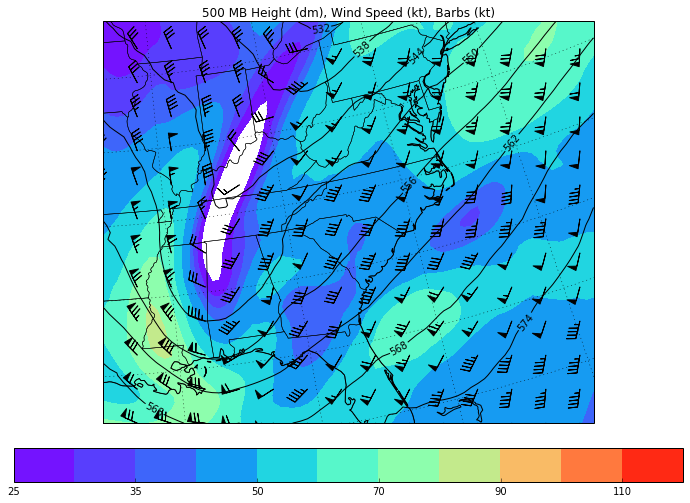

In [13]:
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim

# Open the NetCDF file
ncfile = Dataset('../wrfout_d01_2000-01-24_12')

# Extract the pressure, geopotential height, and wind variables
p = getvar(ncfile, "pressure")
z = getvar(ncfile, "z", units="dm")
ua = getvar(ncfile, "ua", units="kt")
va = getvar(ncfile, "va", units="kt")
wspd = getvar(ncfile, "wspd_wdir", units="kts")[0,:]

# Interpolate geopotential height, u, and v winds to 500 hPa
ht_500 = interplevel(z, p, 500)
u_500 = interplevel(ua, p, 500)
v_500 = interplevel(va, p, 500)
wspd_500 = interplevel(wspd, p, 500)

# Get the lat/lon coordinates
lats, lons = latlon_coords(ht_500)

# Get the map projection information
cart_proj = get_cartopy(ht_500)

# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, linewidth=0.5)
ax.coastlines('50m', linewidth=0.8)

# Add the 500 hPa geopotential height contours
levels = np.arange(520., 580., 6.)
contours = plt.contour(to_np(lons), to_np(lats), to_np(ht_500), levels=levels, colors="black",
                       transform=crs.PlateCarree())
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed contours
levels = [25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
wspd_contours = plt.contourf(to_np(lons), to_np(lats), to_np(wspd_500), levels=levels,
                             cmap=get_cmap("rainbow"),
                             transform=crs.PlateCarree())
plt.colorbar(wspd_contours, ax=ax, orientation="horizontal", pad=.05)

# Add the 500 hPa wind barbs, only plotting every 5th data point.
plt.barbs(to_np(lons[::5,::5]), to_np(lats[::5,::5]), to_np(u_500[::5, ::5]),
          to_np(v_500[::5, ::5]), length=6,
             sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
             linewidth=0.95, transform=crs.PlateCarree())

# Set the map bounds
ax.set_xlim(cartopy_xlim(ht_500))
ax.set_ylim(cartopy_ylim(ht_500))

ax.gridlines()

plt.title("500 MB Height (dm), Wind Speed (kt), Barbs (kt)")

plt.show()

<h2>SkewT Plot: Sounding Database at University of Wyoming </h2>
http://weather.uwyo.edu/upperair/sounding.html

For an overview about SkewT plots: http://www.srh.noaa.gov/jetstream/upperair/skewtplots.html

You will need to add pip install siphon to your bash script, but it probably won't work unless the servers it calls are whitelisted.  I will work on this, in the mean time you can use the file attached to this email.

Anna


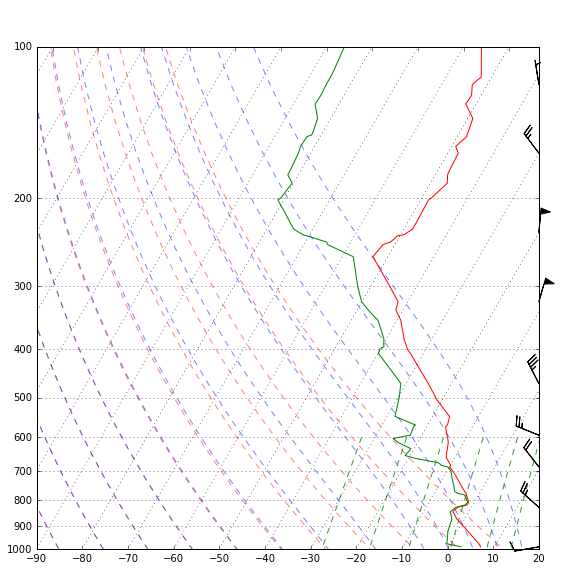

In [15]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.calc import resample_nn_1d
from metpy.plots import SkewT
from metpy.units import units

# Change default to be better for skew-T
plt.rcParams['figure.figsize'] = (9, 9)



#This is where you will need to load in the file:
dataset = pd.read_csv('ILX_10_25_0.csv')
#with UseSampleData():  # Only needed to use our local sample data
    # Download and parse the data
#    dataset = WyomingUpperAir.request_data(datetime(2017, 10, 25, 0), 'ILX')

p = dataset['pressure'][:]
T = dataset['temperature'][:]
Td = dataset['dewpoint'][:]
u = dataset['u_wind'][:]
v = dataset['v_wind'][:]

skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::10], u[::10], v[::10])

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

plt.savefig('ILX.png')
plt.show()



This is the matplotlib example of a SkewT, so you can understand what goes into plotting these.

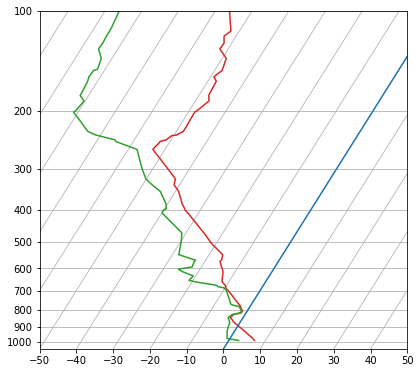

In [29]:
"""
===========================================================
SkewT-logP diagram: using transforms and custom projections
===========================================================

This serves as an intensive exercise of matplotlib's transforms and custom
projection API. This example produces a so-called SkewT-logP diagram, which is
a common plot in meteorology for displaying vertical profiles of temperature.
As far as matplotlib is concerned, the complexity comes from having X and Y
axes that are not orthogonal. This is handled by including a skew component to
the basic Axes transforms. Additional complexity comes in handling the fact
that the upper and lower X-axes have different data ranges, which necessitates
a bunch of custom classes for ticks,spines, and the axis to handle this.

"""

from matplotlib.axes import Axes
import matplotlib.transforms as transforms
import matplotlib.axis as maxis
import matplotlib.spines as mspines
from matplotlib.projections import register_projection


# The sole purpose of this class is to look at the upper, lower, or total
# interval as appropriate and see what parts of the tick to draw, if any.
class SkewXTick(maxis.XTick):
    def update_position(self, loc):
        # This ensures that the new value of the location is set before
        # any other updates take place
        self._loc = loc
        super(SkewXTick, self).update_position(loc)

    def _has_default_loc(self):
        return self.get_loc() is None

    def _need_lower(self):
        return (self._has_default_loc() or
                transforms.interval_contains(self.axes.lower_xlim,
                                             self.get_loc()))

    def _need_upper(self):
        return (self._has_default_loc() or
                transforms.interval_contains(self.axes.upper_xlim,
                                             self.get_loc()))

    @property
    def gridOn(self):
        return (self._gridOn and (self._has_default_loc() or
                transforms.interval_contains(self.get_view_interval(),
                                             self.get_loc())))

    @gridOn.setter
    def gridOn(self, value):
        self._gridOn = value

    @property
    def tick1On(self):
        return self._tick1On and self._need_lower()

    @tick1On.setter
    def tick1On(self, value):
        self._tick1On = value

    @property
    def label1On(self):
        return self._label1On and self._need_lower()

    @label1On.setter
    def label1On(self, value):
        self._label1On = value

    @property
    def tick2On(self):
        return self._tick2On and self._need_upper()

    @tick2On.setter
    def tick2On(self, value):
        self._tick2On = value

    @property
    def label2On(self):
        return self._label2On and self._need_upper()

    @label2On.setter
    def label2On(self, value):
        self._label2On = value

    def get_view_interval(self):
        return self.axes.xaxis.get_view_interval()


# This class exists to provide two separate sets of intervals to the tick,
# as well as create instances of the custom tick
class SkewXAxis(maxis.XAxis):
    def _get_tick(self, major):
        return SkewXTick(self.axes, None, '', major=major)

    def get_view_interval(self):
        return self.axes.upper_xlim[0], self.axes.lower_xlim[1]


# This class exists to calculate the separate data range of the
# upper X-axis and draw the spine there. It also provides this range
# to the X-axis artist for ticking and gridlines
class SkewSpine(mspines.Spine):
    def _adjust_location(self):
        pts = self._path.vertices
        if self.spine_type == 'top':
            pts[:, 0] = self.axes.upper_xlim
        else:
            pts[:, 0] = self.axes.lower_xlim


# This class handles registration of the skew-xaxes as a projection as well
# as setting up the appropriate transformations. It also overrides standard
# spines and axes instances as appropriate.
class SkewXAxes(Axes):
    # The projection must specify a name.  This will be used be the
    # user to select the projection, i.e. ``subplot(111,
    # projection='skewx')``.
    name = 'skewx'

    def _init_axis(self):
        # Taken from Axes and modified to use our modified X-axis
        self.xaxis = SkewXAxis(self)
        self.spines['top'].register_axis(self.xaxis)
        self.spines['bottom'].register_axis(self.xaxis)
        self.yaxis = maxis.YAxis(self)
        self.spines['left'].register_axis(self.yaxis)
        self.spines['right'].register_axis(self.yaxis)

    def _gen_axes_spines(self):
        spines = {'top': SkewSpine.linear_spine(self, 'top'),
                  'bottom': mspines.Spine.linear_spine(self, 'bottom'),
                  'left': mspines.Spine.linear_spine(self, 'left'),
                  'right': mspines.Spine.linear_spine(self, 'right')}
        return spines

    def _set_lim_and_transforms(self):
        """
        This is called once when the plot is created to set up all the
        transforms for the data, text and grids.
        """
        rot = 30

        # Get the standard transform setup from the Axes base class
        Axes._set_lim_and_transforms(self)

        # Need to put the skew in the middle, after the scale and limits,
        # but before the transAxes. This way, the skew is done in Axes
        # coordinates thus performing the transform around the proper origin
        # We keep the pre-transAxes transform around for other users, like the
        # spines for finding bounds
        self.transDataToAxes = self.transScale + \
            self.transLimits + transforms.Affine2D().skew_deg(rot, 0)

        # Create the full transform from Data to Pixels
        self.transData = self.transDataToAxes + self.transAxes

        # Blended transforms like this need to have the skewing applied using
        # both axes, in axes coords like before.
        self._xaxis_transform = (transforms.blended_transform_factory(
            self.transScale + self.transLimits,
            transforms.IdentityTransform()) +
            transforms.Affine2D().skew_deg(rot, 0)) + self.transAxes

    @property
    def lower_xlim(self):
        return self.axes.viewLim.intervalx

    @property
    def upper_xlim(self):
        pts = [[0., 1.], [1., 1.]]
        return self.transDataToAxes.inverted().transform(pts)[:, 0]


# Now register the projection with matplotlib so the user can select
# it.
register_projection(SkewXAxes)

if __name__ == '__main__':
    # Now make a simple example using the custom projection.
    from matplotlib.ticker import (MultipleLocator, NullFormatter,
                                   ScalarFormatter)
    import matplotlib.pyplot as plt
    from six import StringIO
    import numpy as np

    # Using the example from above
    data_txt = dataset
     
    p = dataset['pressure'][:]
    T = dataset['temperature'][:]
    Td = dataset['dewpoint'][:]
    u = dataset['u_wind'][:]
    v = dataset['v_wind'][:]

    #p, h, T, Td = np.loadtxt(sound_data, usecols=range(0, 4), unpack=True)

    # Create a new figure. The dimensions here give a good aspect ratio
    fig = plt.figure(figsize=(6.5875, 6.2125))
    ax = fig.add_subplot(111, projection='skewx')

    plt.grid(True)

    # Plot the data using normal plotting functions, in this case using
    # log scaling in Y, as dictated by the typical meteorological plot
    ax.semilogy(T, p, color='C3')
    ax.semilogy(Td, p, color='C2')

    # An example of a slanted line at constant X
    l = ax.axvline(0, color='C0')

    # Disables the log-formatting that comes with semilogy
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())
    ax.set_yticks(np.linspace(100, 1000, 10))
    ax.set_ylim(1050, 100)

    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.set_xlim(-50, 50)

    plt.show()